## Plotting data from a CSV file

In this notebook we explore historical data on CO<sub>2</sub> levels in the atmosphere. This data is available as a CSV file (comma-separated value text file) from [this site](http://data.okfn.org/data/core/co2-ppm#data). Our objective is to reproduce a graph similar to the one shown below (but prettier).

![Atmospheric CO2, 1958-2016](../images/co2-levels-since-1958.jpg)

### Reading the data

We read the data into a dataframe using the `pandas.read_csv` method. The first row is a header row, and is used to name the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/co2-mm-mlo.csv')
df.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03,1958.208,315.71,315.71,314.62,-1
1,1958-04,1958.292,317.45,317.45,315.29,-1
2,1958-05,1958.375,317.50,317.50,314.71,-1
3,1958-06,1958.458,-99.99,317.10,314.85,-1
4,1958-07,1958.542,315.86,315.86,314.98,-1


### Cleaning the data
1. Convert the Date column from string to datetime format.
2. Set the date as the index.
3. The source data uses -99.99 for missing values. Replace -99.99 with NaN (not a number).
4. Keep only the columns `Interpolated` and `Trend`.


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.replace({-99.99: np.nan}, inplace=True)
df = df[['Interpolated', 'Trend']]
df.head()

,Interpolated,Trend
Date,,
1958-03-01,315.71,314.62
1958-04-01,317.45,315.29
1958-05-01,317.50,314.71
1958-06-01,317.10,314.85
1958-07-01,315.86,314.98


### Plotting the data

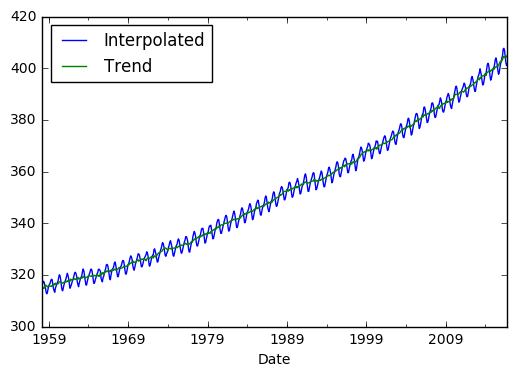

In [3]:
df.plot()

**Exercise:** Add a title to this graph, and label the vertical axis.